# Lab: Working With Images
Understand how to deal with real world image datasets

### Runtime
20-30 Minutes

### Reference
- https://www.tensorflow.org/tutorials/images/classification
- https://www.tensorflow.org/guide/data

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
print ('tensorflow version :', tf.__version__)
# tf.config.experimental.list_physical_devices()

tensorflow version : 2.2.0


In [ ]:
## Add top level dir to include path
import os
import sys
from pathlib import Path

top_dir = os.path.abspath(Path(os.getcwd()).parent)
if top_dir not in sys.path:
    sys.path.append(top_dir)

## Step 1: Download Data: 'Cat-Dog-Redux'

In [2]:
import os

data_location = 'https://elephantscale-public.s3.amazonaws.com/data/images/cat-dog-redux.zip'

data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location, extract=True)
print ('local download file: ', data_location_local)

local download file:  /home/sujee/.keras/datasets/cat-dog-redux.zip


### Peek inside the directory
Let's understand how downloaded files are stored

In [3]:
## Peek inside the directory
download_dir = os.path.dirname(data_location_local)
print ("download dir: ", download_dir )

# print a nice tree
! tree -d $download_dir

## if the above doesn't work, use the one below
# print ("listing of download dir: ", os.listdir(os.path.dirname(data_location_local)))

download dir:  /home/sujee/.keras/datasets
/home/sujee/.keras/datasets
├── cat-dog
│   └── data
│       ├── train
│       │   ├── cats
│       │   └── dogs
│       └── validation
│           ├── cats
│           └── dogs
├── cat-dog-redux
│   ├── train
│   │   ├── cat
│   │   └── dog
│   └── val
│       ├── cat
│       └── dog
├── cats_and_dogs_filtered
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── validation
│       ├── cats
│       └── dogs
├── cifar-10-batches-py
├── data
│   ├── train
│   │   ├── cat
│   │   └── dog
│   └── val
│       ├── cat
│       └── dog
└── flowers
    ├── training
    │   ├── daisy
    │   ├── dandelion
    │   ├── roses
    │   ├── sunflowers
    │   └── tulips
    └── validation
        ├── daisy
        ├── dandelion
        ├── roses
        ├── sunflowers
        └── tulips

43 directories


In [4]:
import glob

## We get the name 'cat-dog-redux' from the above directory listing
data_dir = os.path.join(os.path.dirname(data_location_local), 'cat-dog-redux')
print ('local data dir: ', data_dir)

## peek inside our data dir
print ('here is how files are organized:')

! tree -d $data_dir

listing = glob.glob(os.path.join(data_dir, "**/*/"), recursive=True)
for d in listing:
    print (d)

local data dir:  /home/sujee/.keras/datasets/cat-dog-redux
here is how files are organized:
/home/sujee/.keras/datasets/cat-dog-redux
├── train
│   ├── cat
│   └── dog
└── val
    ├── cat
    └── dog

6 directories
/home/sujee/.keras/datasets/cat-dog-redux/train/
/home/sujee/.keras/datasets/cat-dog-redux/val/
/home/sujee/.keras/datasets/cat-dog-redux/train/dog/
/home/sujee/.keras/datasets/cat-dog-redux/train/cat/
/home/sujee/.keras/datasets/cat-dog-redux/val/dog/
/home/sujee/.keras/datasets/cat-dog-redux/val/cat/


In [5]:
## We get the 'train' 'val' directory names from above listing
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')
print ('train dir:', train_dir)
print ('validation dir:', validation_dir)

train dir: /home/sujee/.keras/datasets/cat-dog-redux/train
validation dir: /home/sujee/.keras/datasets/cat-dog-redux/val


In [6]:
## print out stats about our dataset

## If you are running on Google colab, the following import might fail
## Upload the 'image_utils.py' into the file system
from image_utils import print_training_validation_stats


print_training_validation_stats (train_dir, validation_dir)

Found class lables: ['dog', 'cat']

--- training_data (/home/sujee/.keras/datasets/cat-dog-redux/train):  files=500,  size=10.95 MB
       +-- dog :  files=250,  size=6.04 MB
       +-- cat :  files=250,  size=4.92 MB

--- validation_data (/home/sujee/.keras/datasets/cat-dog-redux/val):  files=500,  size=10.92 MB
       +-- dog :  files=250,  size=5.74 MB
       +-- cat :  files=250,  size=5.17 MB


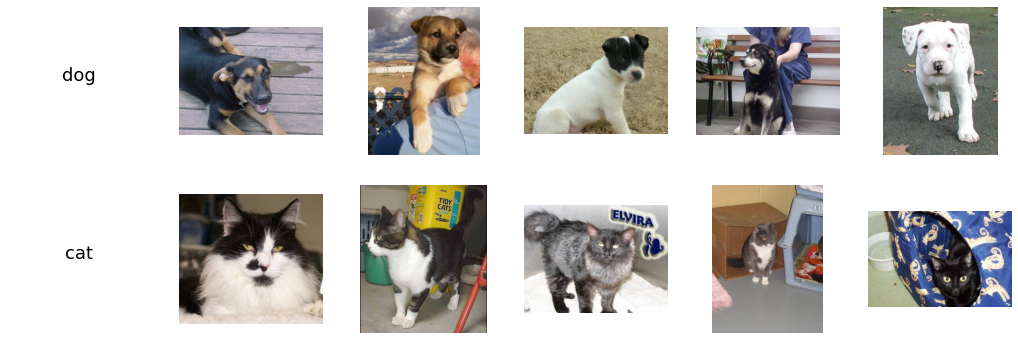

In [7]:
from image_utils import display_images_from_dir
display_images_from_dir(train_dir, 5)

## Step 2: Download Data: 'Flowers'

In [8]:
import os

data_location = 'https://elephantscale-public.s3.amazonaws.com/data/images/flowers.zip'

data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location, extract=True)
print ('local download file: ', data_location_local)

local download file:  /home/sujee/.keras/datasets/flowers.zip


In [10]:
## Peek inside the directory
download_dir = os.path.dirname(data_location_local)
print ("download dir: ", download_dir )

# linux
! tree -d $download_dir

## if the above doesn't work, try this
# print ("listing of download dir: ", os.listdir(os.path.dirname(data_location_local)))

download dir:  /home/sujee/.keras/datasets
/home/sujee/.keras/datasets
├── cat-dog
│   └── data
│       ├── train
│       │   ├── cats
│       │   └── dogs
│       └── validation
│           ├── cats
│           └── dogs
├── cat-dog-redux
│   ├── train
│   │   ├── cat
│   │   └── dog
│   └── val
│       ├── cat
│       └── dog
├── cats_and_dogs_filtered
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── validation
│       ├── cats
│       └── dogs
├── cifar-10-batches-py
├── data
│   ├── train
│   │   ├── cat
│   │   └── dog
│   └── val
│       ├── cat
│       └── dog
└── flowers
    ├── training
    │   ├── daisy
    │   ├── dandelion
    │   ├── roses
    │   ├── sunflowers
    │   └── tulips
    └── validation
        ├── daisy
        ├── dandelion
        ├── roses
        ├── sunflowers
        └── tulips

43 directories


In [11]:
import glob

## We get the name 'flowers' from the above directory listing
data_dir = os.path.join(os.path.dirname(data_location_local), 'flowers')
print ('local data dir: ', data_dir)

## peek inside our data dir
print ('here is how files are organized:')
! tree -d $data_dir
listing = glob.glob(os.path.join(data_dir, "**/*/"), recursive=True)
for d in listing:
    print (d)

local data dir:  /home/sujee/.keras/datasets/flowers
here is how files are organized:
/home/sujee/.keras/datasets/flowers
├── training
│   ├── daisy
│   ├── dandelion
│   ├── roses
│   ├── sunflowers
│   └── tulips
└── validation
    ├── daisy
    ├── dandelion
    ├── roses
    ├── sunflowers
    └── tulips

12 directories
/home/sujee/.keras/datasets/flowers/validation/
/home/sujee/.keras/datasets/flowers/training/
/home/sujee/.keras/datasets/flowers/validation/daisy/
/home/sujee/.keras/datasets/flowers/validation/sunflowers/
/home/sujee/.keras/datasets/flowers/validation/roses/
/home/sujee/.keras/datasets/flowers/validation/tulips/
/home/sujee/.keras/datasets/flowers/validation/dandelion/
/home/sujee/.keras/datasets/flowers/training/daisy/
/home/sujee/.keras/datasets/flowers/training/sunflowers/
/home/sujee/.keras/datasets/flowers/training/roses/
/home/sujee/.keras/datasets/flowers/training/tulips/
/home/sujee/.keras/datasets/flowers/training/dandelion/


In [12]:
## We get the 'train' 'val' directory names from above listing
train_dir = os.path.join(data_dir, 'training')
validation_dir = os.path.join(data_dir, 'validation')
print ('train dir:', train_dir)
print ('validation dir:', validation_dir)

train dir: /home/sujee/.keras/datasets/flowers/training
validation dir: /home/sujee/.keras/datasets/flowers/validation


In [13]:
from image_utils import print_training_validation_stats

print_training_validation_stats (train_dir, validation_dir)

Found class lables: ['daisy', 'sunflowers', 'roses', 'tulips', 'dandelion']

--- training_data (/home/sujee/.keras/datasets/flowers/training):  files=3089,  size=194.66 MB
       +-- daisy :  files=533,  size=28.69 MB
       +-- sunflowers :  files=588,  size=46.26 MB
       +-- roses :  files=513,  size=31.78 MB
       +-- tulips :  files=677,  size=47.09 MB
       +-- dandelion :  files=776,  size=40.84 MB

--- validation_data (/home/sujee/.keras/datasets/flowers/validation):  files=583,  size=27.02 MB
       +-- daisy :  files=100,  size=4.04 MB
       +-- sunflowers :  files=111,  size=6.14 MB
       +-- roses :  files=128,  size=6.12 MB
       +-- tulips :  files=122,  size=5.47 MB
       +-- dandelion :  files=122,  size=5.25 MB


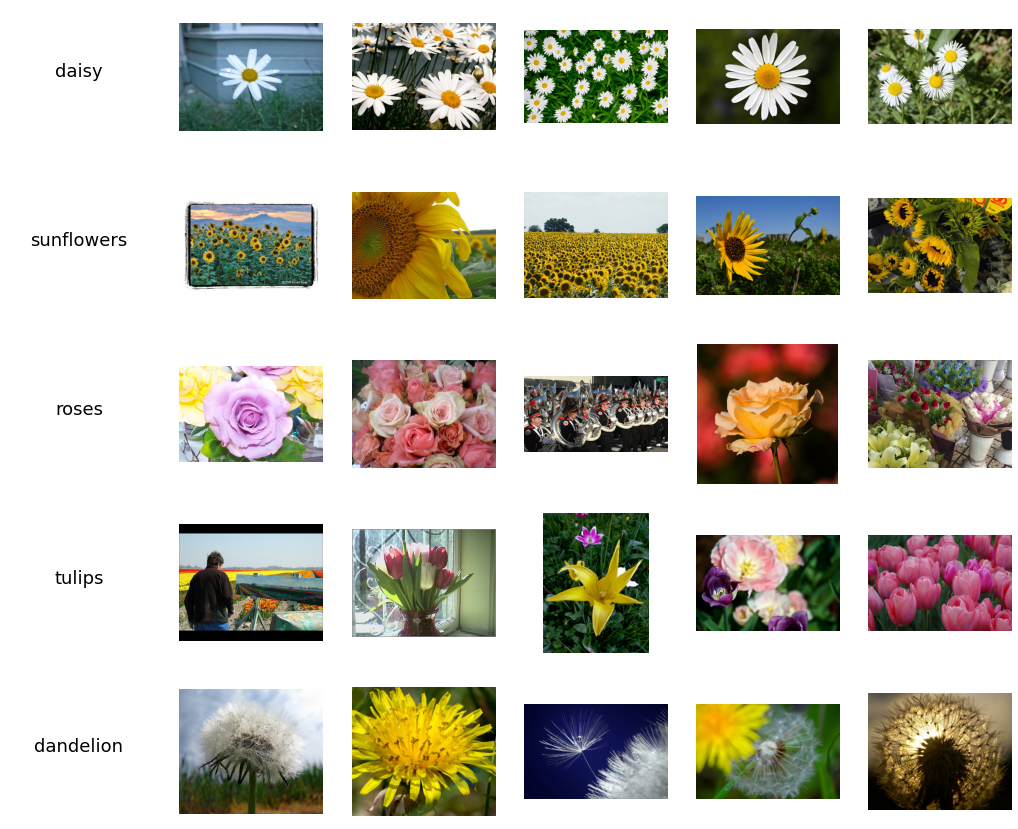

In [14]:
from image_utils import display_images_from_dir

display_images_from_dir(train_dir, 5)

## Step 3: Your Turn - Create a image bundle
- Download this sample image bundle [cars-trucks-busses.zip](https://elephantscale-public.s3.amazonaws.com/data/images/cars-trucks-busses.zip)
- We have mixed images of busses, cars and trucks
- Sort them and organize them into directory format that tensorflow will understand

Once you sorted them into classes and then into training & validation, try the following code to see if the structure looks right.

In [ ]:
## TODO : point my_data_dir to where ever the dataset is
my_data_dir = 'cars-trucks-busses'
my_training_dir = os.path.join(my_data_dir, 'training')
my_validation_dir = os.path.join(my_data_dir, 'validation')

print_training_validation_stats (my_training_dir, my_validation_dir)